### Demonstration of ray-tracing with Shadow and diffraction with SimEx

This notebook showcases a short demonstration of a ray-tracing simulation of the ID23-2 beamline of ESRF. The output is then saved as openPMD hdf5 file and used as an input for SimEx. GAPD calculator is used to calculate diffracted intensity.

In [1]:
# Python script to run shadow3. Created automatically with ShadowTools.make_python_script_from_list().
import Shadow
import numpy

# write (1) or not (0) SHADOW files start.xx end.xx star.xx
iwrite = 0

Initialize Shadow source, beam and optical elements parameters. Beamline sketch from J. Syn. Rad. 17 (2010), 107-118, ISSN: 1600-5775, https://doi.org/10.1107/S0909049509041168 (https://journals.iucr.org/s/issues/2010/01/00/hi5601/index.html):
<img src="ID23_distances.png">

In [2]:
#
# initialize shadow3 source (oe0) and beam
#
beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()
oe3 = Shadow.OE()
oe4 = Shadow.OE()
oe5 = Shadow.OE()

#
# Define variables. See meaning of variables in: 
#  https://raw.githubusercontent.com/srio/shadow3/master/docs/source.nml 
#  https://raw.githubusercontent.com/srio/shadow3/master/docs/oe.nml
#

oe0.FDISTR = 3
oe0.F_COLOR = 3
oe0.F_PHOT = 0
oe0.F_POLAR = 0
oe0.HDIV1 = 0.0
oe0.HDIV2 = 0.0
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 5676561
oe0.NPOINT = 500000
oe0.PH1 = 14100.0
oe0.PH2 = 14300.0
oe0.SIGDIX = 9.5e-05
oe0.SIGDIZ = 3.1e-06
oe0.SIGMAX = 6.1e-05
oe0.SIGMAZ = 9e-06
oe0.VDIV1 = 0.0
oe0.VDIV2 = 0.0

oe1.DUMMY = 100.0
oe1.FWRITE = 3
oe1.F_REFRAC = 2
oe1.F_SCREEN = 1
oe1.N_SCREEN = 1
oe1.T_IMAGE = 0.0
oe1.T_INCIDENCE = 0.0
oe1.T_REFLECTION = 180.0
oe1.T_SOURCE = 28.2

oe2.DUMMY = 100.0
oe2.FHIT_C = 1
oe2.FILE_REFL = b'/home/andrea/openPMD/si5_15.111'
oe2.FWRITE = 1
oe2.F_CENTRAL = 1
oe2.F_CRYSTAL = 1
oe2.PHOT_CENT = 14200.0
oe2.RLEN1 = 0.02
oe2.RLEN2 = 0.02
oe2.RWIDX1 = 0.15
oe2.RWIDX2 = 0.15
oe2.R_LAMBDA = 5000.0
oe2.T_IMAGE = 0.0
oe2.T_INCIDENCE = 81.9952066442
oe2.T_REFLECTION = 81.9952066442
oe2.T_SOURCE = 1.8

oe3.DUMMY = 100.0
oe3.FWRITE = 3
oe3.F_REFRAC = 2
oe3.F_SCREEN = 1
oe3.I_SLIT = numpy.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
oe3.N_SCREEN = 1
oe3.RX_SLIT = numpy.array([0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
oe3.RZ_SLIT = numpy.array([0.0008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
oe3.T_IMAGE = 0.0
oe3.T_INCIDENCE = 0.0
oe3.T_REFLECTION = 180.0
oe3.T_SOURCE = 10.9

oe4.DUMMY = 100.0
oe4.FCYL = 1
oe4.FHIT_C = 1
oe4.FMIRR = 2
oe4.FWRITE = 3
oe4.F_DEFAULT = 0
oe4.RLEN1 = 0.15
oe4.RLEN2 = 0.15
oe4.RWIDX1 = 0.02
oe4.RWIDX2 = 0.02
oe4.SIMAG = 2.1
oe4.SSOUR = 43.15
oe4.THETA = 89.77654645989898
oe4.T_IMAGE = 0.1
oe4.T_INCIDENCE = 89.77654645989898
oe4.T_REFLECTION = 89.77654645989898
oe4.T_SOURCE = 2.25

oe5.ALPHA = 90.0
oe5.DUMMY = 100.0
oe5.FCYL = 1
oe5.FHIT_C = 1
oe5.FMIRR = 2
oe5.FWRITE = 3
oe5.F_DEFAULT = 0
oe5.RLEN1 = 0.15
oe5.RLEN2 = 0.15
oe5.RWIDX1 = 0.02
oe5.RWIDX2 = 0.02
oe5.SIMAG = 1.9
oe5.SSOUR = 43.35
oe5.THETA = 89.77654645989898
oe5.T_IMAGE = 1.9
oe5.T_INCIDENCE = 89.77654645989898
oe5.T_REFLECTION = 89.77654645989898
oe5.T_SOURCE = 0.1

Run Shadow and propagate the rays

In [3]:
#Run SHADOW to create the source

iwrite=False

if iwrite:
    oe0.write("start.00")

beam.genSource(oe0)

if iwrite:
    oe0.write("end.00")
    beam.write("begin.dat")


#
#run optical element 1
#
print("    Running optical element: %d"%(1))
if iwrite:
    oe1.write("start.01")

beam.traceOE(oe1,1)

if iwrite:
    oe1.write("end.01")
    beam.write("star.01")


    Running optical element: 1


In [4]:
#
#run optical element 2
#
print("    Running optical element: %d"%(2))
if iwrite:
    oe2.write("start.02")

beam.traceOE(oe2,2)

if iwrite:
    oe2.write("end.02")
    beam.write("star.02")



    Running optical element: 2


In [5]:

# #
#run optical element 3
#
print("    Running optical element: %d"%(3))
if iwrite:
    oe3.write("start.03")

beam.traceOE(oe3,3)

if iwrite:
    oe3.write("end.03")
    beam.write("star.03")



    Running optical element: 3


In [6]:

#
#run optical element 4
#
print("    Running optical element: %d"%(4))
if iwrite:
    oe4.write("start.04")

beam.traceOE(oe4,4)

if iwrite:
    oe4.write("end.04")
    beam.write("star.04")



    Running optical element: 4


In [7]:

#
#run optical element 5
#
print("    Running optical element: %d"%(5))
if iwrite:
    oe5.write("start.05")

beam.traceOE(oe5,5)

if iwrite:
    oe5.write("end.05")
    beam.write("star.05")

    Running optical element: 5


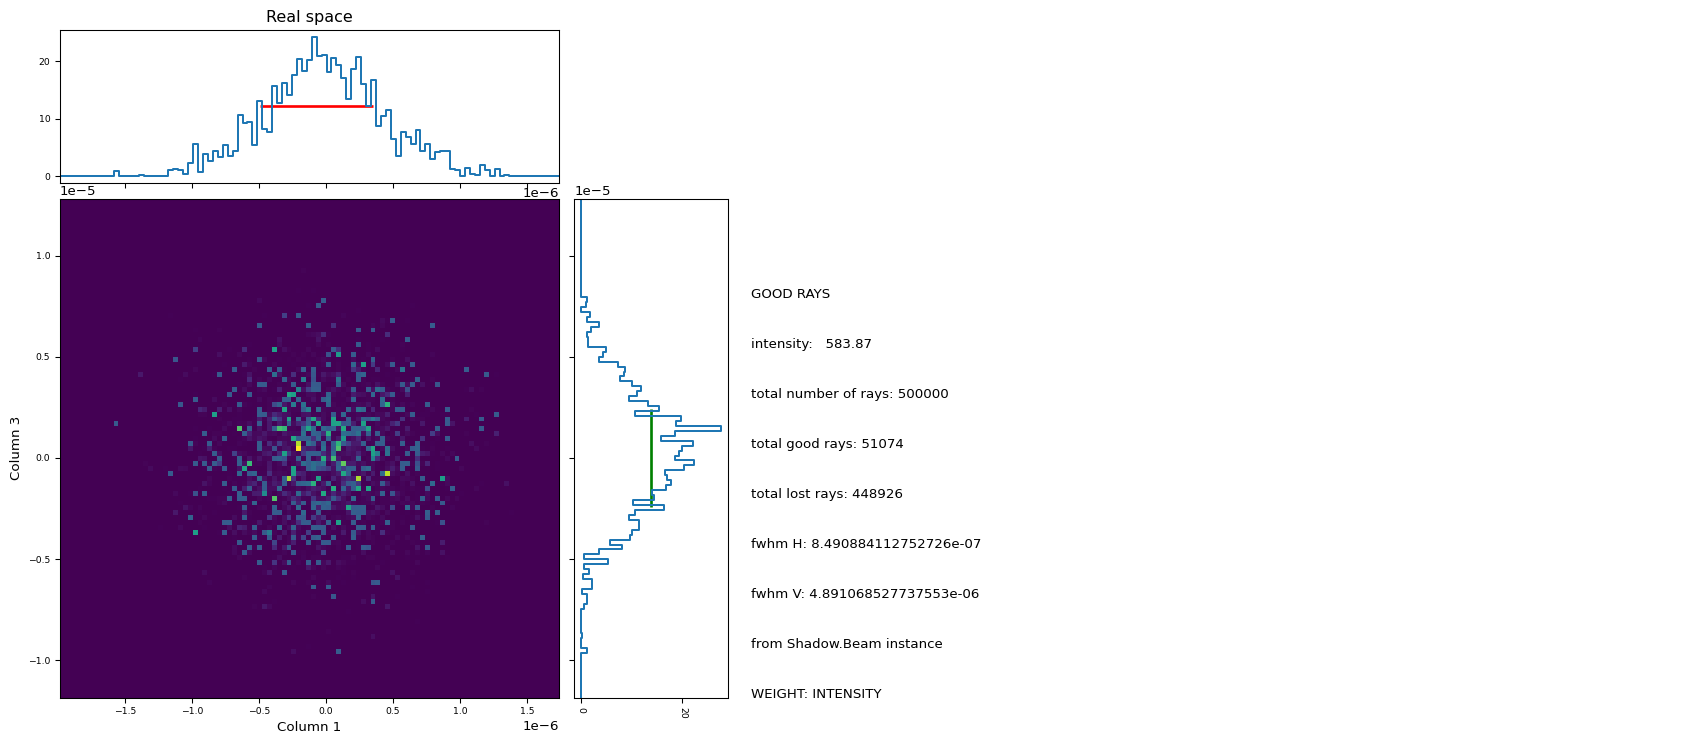

{'error': 1,
 'col_h': 1,
 'col_v': 3,
 'nolost': 1,
 'nbins_h': 101,
 'nbins_v': 101,
 'ref': 23,
 'xrange': [-1.990104372208159e-06, 1.738501259913701e-06],
 'yrange': [-1.1863169686467419e-05, 1.2836726378607122e-05],
 'bin_h_edges': array([-1.99010437e-06, -1.95318748e-06, -1.91627060e-06, -1.87935371e-06,
        -1.84243682e-06, -1.80551993e-06, -1.76860305e-06, -1.73168616e-06,
        -1.69476927e-06, -1.65785239e-06, -1.62093550e-06, -1.58401861e-06,
        -1.54710172e-06, -1.51018484e-06, -1.47326795e-06, -1.43635106e-06,
        -1.39943417e-06, -1.36251729e-06, -1.32560040e-06, -1.28868351e-06,
        -1.25176662e-06, -1.21484974e-06, -1.17793285e-06, -1.14101596e-06,
        -1.10409907e-06, -1.06718219e-06, -1.03026530e-06, -9.93348411e-07,
        -9.56431524e-07, -9.19514636e-07, -8.82597749e-07, -8.45680861e-07,
        -8.08763974e-07, -7.71847086e-07, -7.34930199e-07, -6.98013312e-07,
        -6.61096424e-07, -6.24179537e-07, -5.87262649e-07, -5.50345762e-07,
    

In [8]:
Shadow.ShadowTools.plotxy(beam,1,3,nbins=101,nolost=1,title="Real space")
# Shadow.ShadowTools.plotxy(beam,1,4,nbins=101,nolost=1,title="Phase space X")
# Shadow.ShadowTools.plotxy(beam,3,6,nbins=101,nolost=1,title="Phase space Z")
    

### Save output to hdf file

In [14]:
import openpmd_api as api
import time
import datetime
import numpy as np
from numpy.random import random

def saveShadowToHDF(oasysRaysObject, filename='ShadowOutput.h5'):
    '''
    Beam.getshonecol(colNo)
    Extract a column from a shadow file (eg. begin.dat) or a Shadow.Beam instance.
    The column are numbered in the fortran convention, i.e. starting from 1.
    It returns a numpy.array filled with the values of the chosen column.

    Inumpy.ts:
       beam     : str instance with the name of the shadow file to be loaded. OR
                  Shadow.Beam initialized instance.
       col      : int for the chosen columns.

    Outputs:
       numpy.array 1-D with length numpy.INT.

    Error:
       if an error occurs an ArgsError is raised.

    Possible choice for col are:
             1   X spatial coordinate [user's unit]
             2   Y spatial coordinate [user's unit]
             3   Z spatial coordinate [user's unit]
             4   Xp direction or divergence [rads]
             5   Yp direction or divergence [rads]
             6   Zp direction or divergence [rads]
             7   X component of the electromagnetic vector (s-polariz)
             8   Y component of the electromagnetic vector (s-polariz)
             9   Z component of the electromagnetic vector (s-polariz)
            10   Lost ray flag
            11   Energy [eV]
            12   Ray index
            13   Optical path length
            14   Phase (s-polarization) in rad
            15   Phase (p-polarization) in rad
            16   X component of the electromagnetic vector (p-polariz)
            17   Y component of the electromagnetic vector (p-polariz)
            18   Z component of the electromagnetic vector (p-polariz)
            19   Wavelength [A]
            20   R= SQRT(X^2+Y^2+Z^2)
            21   angle from Y axis
            22   the magnitude of the Electromagnetic vector
            23   |E|^2 (total intensity)
            24   total intensity for s-polarization
            25   total intensity for p-polarization
            26   K = 2 pi / lambda [A^-1]
            27   K = 2 pi / lambda * col4 [A^-1]
            28   K = 2 pi / lambda * col5 [A^-1]
            29   K = 2 pi / lambda * col6 [A^-1]
            30   S0-stokes = |Es|^2 + |Ep|^2
            31   S1-stokes = |Es|^2 - |Ep|^2
            32   S2-stokes = 2 |Es| |Ep| cos(phase_s-phase_p)
            33   S3-stokes = 2 |Es| |Ep| sin(phase_s-phase_p)
            34   Power = intensity(col 23) * energy (col 11)
            35   Angle-X with Y: |arcsin(X')|
            36   Angle-Z with Y: |arcsin(Z')|
            37   Angle-X with Y: |arcsin(X') - mean(arcsin(X'))|
            38   Angle-Z with Y: |arcsin(Z') - mean(arcsin(Z'))|
    '''

    SCALAR = api.Mesh_Record_Component.SCALAR
    oasysRays = oasysRaysObject
    try:
        unit = workspace_units_to_cm # Conversion to cm
    except:
        unit = 100.
       
    #Unit_Dimension: length L, mass M, time T, electric current I, thermodynamic temperature theta, amount of substance N, luminous intensity J
    
    series = api.Series(filename, api.Access_Type.create)
    
    # get date
    dateNow = time.strftime('%Y-%m-%d %H:%M:%S %z', time.localtime())
    
    # default series settings
    print("Default settings:")
    print("basePath: ", series.base_path)
    print("openPMD version: ", series.openPMD)
    print("iteration format: ", series.iteration_format)

    # openPMD standard
    series.set_openPMD("1.1.0")
    series.set_openPMD_extension(0)
    series.set_author("Aljosa Hafner <aljosa.hafner@ceric-eric.eu>")

    series.set_date(dateNow)
    series.set_software("OASYS", "1.2")
    series.set_comment("Example output from ShadowOui widget in OASYS.")

#     series.set_particles_path("rays")
    
    n_iter = [0]
    # new iteration
    for n in n_iter:

        cur_it = series.iterations[n]

        nRays = oasysRays.nrays()


        rays = cur_it.particles['rays']

        # id
        id = oasysRays.getshonecol(12)
        d = api.Dataset(id.dtype, id.shape)

        print(id.dtype, id.shape)
        rays["id"][SCALAR].reset_dataset(d)
        rays["id"][SCALAR].store_chunk(id)

# - position: m
# - direction: unitless
# - photonSPolarizationAmplitude: have to check
# - photonSPolarizationPhase: unitless
# - wavelength: nm
        
        # Position 
        position = np.vstack((oasysRays.getshonecol(1),
                               oasysRays.getshonecol(2),
                               oasysRays.getshonecol(3)))  # 3xN

        d = api.Dataset(position.dtype, position.shape)
        rays["position"][SCALAR].reset_dataset(d)
        rays["position"][SCALAR].set_unit_SI(unit/1e2)   # <--------- recheck this.
        rays["position"].set_unit_dimension({api.Unit_Dimension.L: 1.})  # m
        rays["position"][SCALAR].store_chunk(position)
        
        # Direction        
        direction = np.vstack((oasysRays.getshonecol(4),
                              oasysRays.getshonecol(5),
                              oasysRays.getshonecol(6))).T  #3xN
        d = api.Dataset(direction.dtype, direction.shape)
        rays["direction"][SCALAR].reset_dataset(d)
        rays["direction"][SCALAR].set_unit_SI(unit/1e2)        
        rays["direction"][SCALAR].store_chunk(direction)
        
        # Polarization of E-field, S-polarization
        photonSPolarizationAmplitude = np.vstack((oasysRays.getshonecol(7),
                              oasysRays.getshonecol(8),
                              oasysRays.getshonecol(9))).T  #3xN
        d = api.Dataset(photonSPolarizationAmplitude.dtype, photonSPolarizationAmplitude.shape)
        rays["photonSPolarizationAmplitude"][SCALAR].reset_dataset(d)
        rays["photonSPolarizationAmplitude"][SCALAR].set_unit_SI(unit/1e2)
        rays["photonSPolarizationAmplitude"][SCALAR].store_chunk(photonSPolarizationAmplitude)
        
        # Polarization of E-field, P-polarization
        photonPPolarizationAmplitude = np.vstack((oasysRays.getshonecol(16),
                              oasysRays.getshonecol(17),
                              oasysRays.getshonecol(18))).T  #3xN
        d = api.Dataset(photonPPolarizationAmplitude.dtype, photonPPolarizationAmplitude.shape)
        rays["photonPPolarizationAmplitude"][SCALAR].reset_dataset(d)
        rays["photonPPolarizationAmplitude"][SCALAR].set_unit_SI(unit/1e2)
        rays["photonPPolarizationAmplitude"][SCALAR].store_chunk(photonPPolarizationAmplitude)
        
        
    
        # Photon energy [1.602176634e−19 eV = J = kg m^2 s^-2]
        
        wavelength= 1240 / oasysRays.getshonecol(11)
        
        d = api.Dataset(wavelength.dtype, wavelength.shape)
        rays["wavelength"][SCALAR].reset_dataset(d)
        rays["wavelength"][SCALAR].set_unit_SI(1e-9)
        rays["wavelength"].set_unit_dimension({api.Unit_Dimension.L: 1.})
        rays["wavelength"][SCALAR].store_chunk(wavelength)

    

        # Phase for S-polarized and P-polarized photons
        photonSPolarizationPhase = oasysRays.getshonecol(14)
        photonPPolarizationPhase = oasysRays.getshonecol(15)

        d = api.Dataset(photonSPolarizationPhase.dtype, photonSPolarizationPhase.shape)
        rays["photonSPolarizationPhase"][SCALAR].reset_dataset(d)
        rays["photonSPolarizationPhase"][SCALAR].set_unit_SI(1.0)
        rays["photonPPolarizationPhase"][SCALAR].reset_dataset(d)
        rays["photonPPolarizationPhase"][SCALAR].set_unit_SI(1.0)
        rays["photonSPolarizationPhase"][SCALAR].store_chunk(photonSPolarizationPhase)
        rays["photonPPolarizationPhase"][SCALAR].store_chunk(photonPPolarizationPhase)

        
        # Lost rays
        particleStatus = oasysRays.getshonecol(10)
        d = api.Dataset(particleStatus.dtype, particleStatus.shape)
        rays["particleStatus"][SCALAR].reset_dataset(d)
        rays["particleStatus"][SCALAR].set_unit_SI(1.0)
        rays["particleStatus"][SCALAR].store_chunk(particleStatus)

    series.flush()
        
    del series

    
    
saveShadowToHDF(oasysRaysObject=beam,filename='/home/andrea/PycharmProjects/imgs/aljosa/saved.h5')

Default settings:
basePath:  /data/%T/
openPMD version:  1.1.0
iteration format:  /data/%T/
float64 (500000,)
